# 똑같은 코드들

## data: hi?hello!!

In [1]:
def f(txt,mapping):
    return [mapping[chr] for chr in txt]

In [2]:
import torch
txt = list("hi?hello!!") * 100
txt_x = txt[:-1]
txt_y = txt[1:]

In [3]:
mapping = {"!" : 0 ,"?" : 1,"h" : 2, "i" : 3,"e" : 4,"l" : 5, "o" : 6}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")
print(len(mapping))

7


## 초깃값 h_0,c_0는 생략이 가능하다.

`-` 코드1 : 정석코드

In [4]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [5]:
_h0 = _c0 = torch.zeros(1,4).to("cuda:0")
lstm(x,(_h0,_c0))

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

`-` 코드2 : 초깃값이 없는 코드(c0,h0는 사실 없어도 무방함)
`-` 알아서 차원맞춰서 잘 초기화 해줘요.

In [6]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [7]:
lstm(x)

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

## 세트2: x.shape = ($L$,$H_{in}$) or ($L$,$N$,$H_{in}$)

`-` timeseiries와 RNN<br>
timeseries 데이터는 시점(timestep)에 따라서 그 값들이 정렬된 데이터입니다. 각 시점에서의 값들은 서로 연관되어 있습니다. 하나의 timeseries 데이터를 RNN계열의 모형에 입력하면 각 시점에서 값을 재귀적으로 읽어서 $\hat{y}$를 출력합니다.
`-` 파라미터 설명<br>
- $L$ : sequnce length = timestep(시점)의 총 갯수 = timestp의 길이 = 시계열 데이터의 길이
- $H_{in}$ : each timestep(시점)에 들어오는 입력백터의 길이, 입력시계열이 시점별로 몇개의 변수로 나타내어 지는가?,만약에 원핫인코딩으로 정리하면 단어수를 의미함,시점마다 길이는 모두 같음(전처리 과정에서 길이를 같게해주기 때문)
- $N$ : 전체 데이터를 몇개의 시계열(묶음)데이터 인지? = 전체데이터 안에 있는 시계열데이터 묶음의 갯수 = 전체데이터의 미니배치의 갯수, 예를들어 (1000,7)의 shape을 가진 시계열데이터를 2개의 묶음으로 나눈다면 N = batch size = 2,왜 쪼개는지는 나중에 ... 공부

`-` 코드3 : x의 차원은 사실 엄밀하게는 ($L$,$N$,$H_{in}$)이다.

In [8]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda")

In [9]:
lstm(x.reshape(999,1,7)) #전체데이터를 쪼개지 않았으므로 즉 묶음은 1개뿐이므로 N = 1

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 코드4 : `batch_first = True`일 경우 차원은 ($N$,$L$,$H_{in}$)이다.

In [10]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4,batch_first = True).to("cuda")
lstm(x.reshape(1,999,7)) #전체데이터를 쪼개지 않았으므로 즉 묶음은 1개뿐이므로 N = 1

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563],
          [-0.0786, -0.1430, -0.0250,  0.1189],
          [-0.0300, -0.2256, -0.1324,  0.1439],
          ...,
          [-0.0723,  0.0620,  0.1913,  0.2015],
          [-0.1155,  0.0746,  0.1747,  0.2938],
          [-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

## 세트3 : hidden.shape = ($D \times$ `num_layers`,$H_{out}$) or ($D \times$`num_layers`,$N$,$H_{out}$)
네트워크에 우리는 h_0,c_0를 넣었었다.그때 h_0.shape = c_0.shape = (1,$H_{out}$)이었는데 여기서 사실은 1은 $D \times `num_layers`$입니다. 우리는 1개의 히든레이어를 가진 LSTM이므로 `num_layers`= 1 따라서 1이었습니다.<br>

`-`파라미터 설명<br>
- $D$ = 2 if bidirectional = True otherwise = 1 (양방향이면2 단방향이면1,우리는 단방향만 써왔으므로 $D$ = 1)
- `num_layers` = 히든레이어가 1개 이상인 경우(중첩된 RNN)
- $H_{out}$ = 히든노드의 수
- $N$ : 전체시계열 데이터안에 있는 묶음의 갯수 = 전체데이터 안에 있는 시계열데이터 묶음의 갯수 = 전체데이터의 미니배치의 갯수, 미니배치안에 있는 원소들의 갯수가 아님 !! 예를들어 (1000,7)의 shape을 가진 시계열데이터를 2개의 묶음으로 나눈다면 N = batch size = 2,왜 쪼개는지는 나중에 ... 공부

`-`코드5<br>
`-` x.shape = $(1,H_{in}) \to $ x.shape = $(L,1,H_{in})$<br>
`-` h.shape = $(1,H_{out}) \to $ h.shape = $(1,1,H_{out})$

In [11]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [12]:
#엄밀한 방식
_h0,_c0 = torch.zeros(1,4).to("cuda:0"),torch.zeros(1,4).to("cuda:0")
lstm(x.reshape(999,1,7),(_h0.reshape(1,1,4),_c0.reshape(1,1,4)))

#엄밀한 방식2
_h0 = _c0 = torch.zeros(1,1,4).to("cuda:0")
lstm(x.reshape(999,1,7),(_h0,_c0))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 사실 _h0.shape= _c0.shape = ($1,H_{out}$)에서 1은 $D \times$ `numlayers`입니다.<br>
- 만약 은닉계층의 수가 1개인 lstm이라면 _h0.shape = _c0.shape = $(1,H_{out})$
- 만약 은닉계층의 수는 1개,양방향 lstm이라면 _h0.shape = _c0.shape = $(2,H_{out})$
- 만약 은닉계층의 수가 3개인 (단방향)lstm이라면 _h0.shape = _c0.shape = $(3,H_{out})$
- 만약 은닉계층의 수가 3개,양방향 lstm이라면 _h0.shape = _c0.shape = $(6,H_{out})$

# 똑같은 코드들 torch.nn.lstm_cell

`-` 코드1 : 정석코드

In [13]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [14]:
xt = x[[1]] #임의의 t시점(여기서는 t=1)에서의 데이터를 받고
_h0,_c0 = torch.zeros(1,4).to("cuda:0"),torch.zeros(1,4).to("cuda:0")#초기 h0,c0를 만들고
xt.shape,_h0.shape,_c0.shape

(torch.Size([1, 7]), torch.Size([1, 4]), torch.Size([1, 4]))

In [15]:
lstmcell(xt,(_h0,_c0)) #임의의 시점에서의 값,초깃값들을 넣어줌

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`-` 코드2 : 초깃값 생략 코드

In [16]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [17]:
xt = x[[1]] #임의의 t시점(여기서는 t=1)에서의 데이터를 받고
#_h0,_c0 = torch.zeros(1,4).to("cuda:0"),torch.zeros(1,4).to("cuda:0")#초기 h0,c0를 만들고
xt.shape#,_h0.shape,_c0.shape

torch.Size([1, 7])

In [18]:
lstmcell(xt) #임의의 시점에서의 값만 넣어줌

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

## 세트2 : xt.shape = $(N,H_{in}) or (H_{in})$

`-`코드2:초깃값 생략

In [19]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda")

In [20]:
xt = x[[1]]
xt.shape

torch.Size([1, 7])

In [21]:
lstmcell(xt)

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

-코드3:간단한 shape 사용

In [22]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [23]:
xt = x[1]
xt.shape #위의 shape과 다른것을 확인

torch.Size([7])

In [24]:
lstmcell(xt)

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

##

## 세트3 : hidden.shape = $(N,H_{out})$ or $(H_{out})$

`-` 코드4<br>
xt.shape = $(1,H_{in}) \to (H_{in})$<br>
ht.shape = $(1,H_{out}) \to (H_{out})$<br>
더 간단한 차원을 가진 텐서를 입력으로 해도 무방하다.

In [25]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [26]:
xt = x[1]
_h0,_c0 = torch.zeros(4).to("cuda"),torch.zeros(4).to("cuda")
xt.shape,_h0.shape,_c0.shape

(torch.Size([7]), torch.Size([4]), torch.Size([4]))

In [27]:
lstmcell(xt,(_h0,_c0))

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

# 요약

## 똑같은 코드들 정리
`-` 1은 단순한 observation의 차원이 아니다.
`-` 네트워크가(1) 단방향 (2)배치가없는(조각이 없는) (3)중첩하지 않은(다계층이 아닌) 순환망에 한해서는 observation 처럼 생각해도 무방하다. --> 엄밀하게는 위험한 생각입니다.

## 실제구현시
`-` 현실적으로 (1)-(3)이 아닌 조건에서는 Cell 단위로 연산을 이용할 일이 없다. (느립니다.단지 이해용)<br>
`-` torch.nn.RNN or torch.nn.LSTM으로 네트워크를 구성할 시 _h0,_c0의 dim을 명시할 일도 없다.<br>
`-` 입력시계열데이터를 배치로 나누는 경우에 대한 개념만 명확하게 잡으면 된다.배치로 나눌지 말지 나누면 어떻게 되고 안나누면 어떻게 되는지 명확하게 알자.

# 하나의 긴 시계열데이터를 배치로 나눠서 학습해보기 구현

# data

In [28]:
txt = list("hi!")* 3 + list("hi?") * 3
txt

['h',
 'i',
 '!',
 'h',
 'i',
 '!',
 'h',
 'i',
 '!',
 'h',
 'i',
 '?',
 'h',
 'i',
 '?',
 'h',
 'i',
 '?']

## 하나의 긴 시계열데이터를 배치로 나누지 않고 학습
- 배치로 나눴을 경우와 비교하기 위해 먼저 나누지 않고 학습진행.

In [29]:
txt_x = txt[:-1]
txt_y = txt[1:]
mapping = {"!": 0 ,"?":1 , "h":2 ,"i" : 3}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda")
print(x.shape)

torch.Size([17, 4])


In [30]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(4,10).to("cuda")
linr = torch.nn.Linear(10,4).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm.parameters()) + list(linr.parameters()))

In [31]:
for epoch in range(1000):
    ## 1
    hidden,(h_T,c_T) = lstm(x)
    #hidden은 가장 깊이 있는 은닉계층의 모든 시점에서 output이므로 hidden.shape = (17,10)
    #h_T,c_T는 모든 은닉계층에서 마지막 시점에서 output이므로 h_T(c_T).shape = c_T.shape = (1,10)
    print(hidden.shape,h_T.shape,c_T.shape)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4
    optimizer.step()
    optimizer.zero_grad()

torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) tor

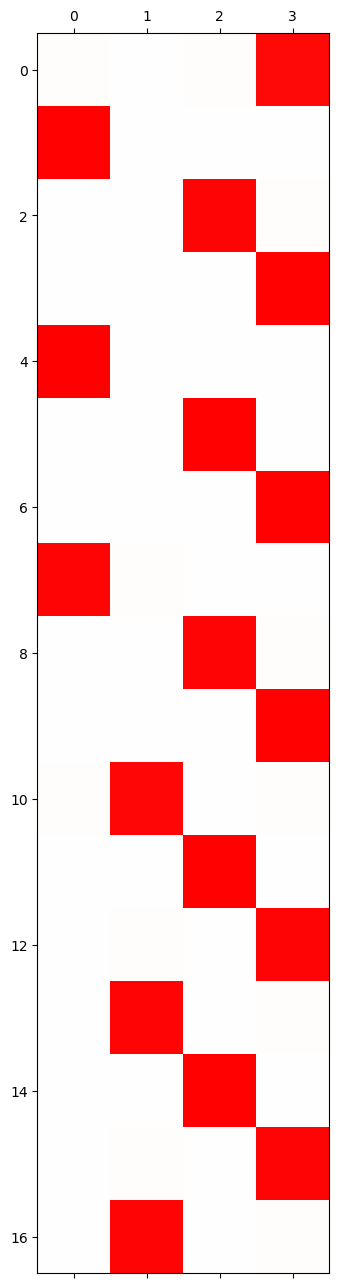

In [32]:
import matplotlib.pyplot as plt
soft = torch.nn.Softmax(dim=1)
plt.matshow(soft(output).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

## 하나의 긴 시계열 데이터를 배치로 나눠서 학습

시계열 데이터셋이 배치로 나뉘어져 있을 경우,파이토치에서는 $(L,N,H_{in})$의 shape을 요구한다. 다음의 과정은 shape을 맞추기 위해 진행하는 과정이다.

In [33]:
txt1 = txt[:9]
txt2 = txt[9:]

In [34]:
txt1_x = txt1[:-1]
txt1_y = txt1[1:]
txt2_x = txt2[:-1]
txt2_y = txt2[1:]

In [35]:
mapping = {"!":0,"?":1,"h":2,"i":3}
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda")

In [36]:
x1.shape,y1.shape,x2.shape,y2.shape

(torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]))

In [37]:
xx = torch.stack([x1,x2],axis=1)
yy = torch.stack([y1,y2],axis=1)
xx.shape,yy.shape

(torch.Size([8, 2, 4]), torch.Size([8, 2, 4]))

In [38]:
xx,yy

(tensor([[[0., 0., 1., 0.],
          [0., 0., 1., 0.]],
 
         [[0., 0., 0., 1.],
          [0., 0., 0., 1.]],
 
         [[1., 0., 0., 0.],
          [0., 1., 0., 0.]],
 
         [[0., 0., 1., 0.],
          [0., 0., 1., 0.]],
 
         [[0., 0., 0., 1.],
          [0., 0., 0., 1.]],
 
         [[1., 0., 0., 0.],
          [0., 1., 0., 0.]],
 
         [[0., 0., 1., 0.],
          [0., 0., 1., 0.]],
 
         [[0., 0., 0., 1.],
          [0., 0., 0., 1.]]], device='cuda:0'),
 tensor([[[0., 0., 0., 1.],
          [0., 0., 0., 1.]],
 
         [[1., 0., 0., 0.],
          [0., 1., 0., 0.]],
 
         [[0., 0., 1., 0.],
          [0., 0., 1., 0.]],
 
         [[0., 0., 0., 1.],
          [0., 0., 0., 1.]],
 
         [[1., 0., 0., 0.],
          [0., 1., 0., 0.]],
 
         [[0., 0., 1., 0.],
          [0., 0., 1., 0.]],
 
         [[0., 0., 0., 1.],
          [0., 0., 0., 1.]],
 
         [[1., 0., 0., 0.],
          [0., 1., 0., 0.]]], device='cuda:0'))

torch.stack에서 axis의 인자로 1을 넣어 $batch size = 2$인 $(8,2,4)$의 shape을 가지는 텐서를 만듦

준비단계

In [39]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(4,10).to("cuda")
linr = torch.nn.Linear(10,4).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr = 0.1)

학습단계
- 먼저 관찰하기위해서 'hi!'가 3번반복되는 배치와 hi?가 3번반복되는 배치를 따로 분리하고 네트워크에 입력하여 학습.

In [40]:
for epoch in range(100):
    ## 1
    hidden,(h_T,c_T) = lstm(xx)
    #hidden은 가장 깊이 있는 은닉계층의 모든 시점에서 output이므로 hidden.shape = (17,10)
    #h_T,c_T는 모든 은닉계층에서 마지막 시점에서 output이므로 h_T(c_T).shape = c_T.shape = (1,10)
    #print(hidden.shape,h_T.shape,c_T.shape)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output[:,0,:],yy[:,0,:]) + loss_fn(output[:,1,:],yy[:,1,:])
    if epoch % 20 == 0:
        print(epoch,loss)
    ## 3
    loss.backward()
    ## 4
    optimizer.step()
    optimizer.zero_grad()

0 tensor(2.7541, device='cuda:0', grad_fn=<AddBackward0>)
20 tensor(0.1803, device='cuda:0', grad_fn=<AddBackward0>)
40 tensor(0.1739, device='cuda:0', grad_fn=<AddBackward0>)
60 tensor(0.1735, device='cuda:0', grad_fn=<AddBackward0>)
80 tensor(0.1735, device='cuda:0', grad_fn=<AddBackward0>)


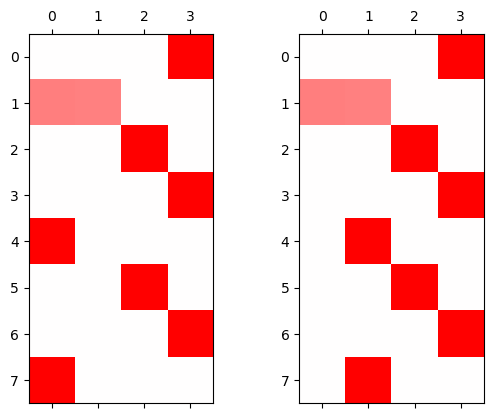

In [41]:
fig,ax = plt.subplots(1,2)
ax[0].matshow(soft(output[:,0,:]).to("cpu").data,cmap="bwr",vmin=-1,vmax=1)
ax[1].matshow(soft(output[:,1,:]).to("cpu").data,cmap="bwr",vmin=-1,vmax=1)


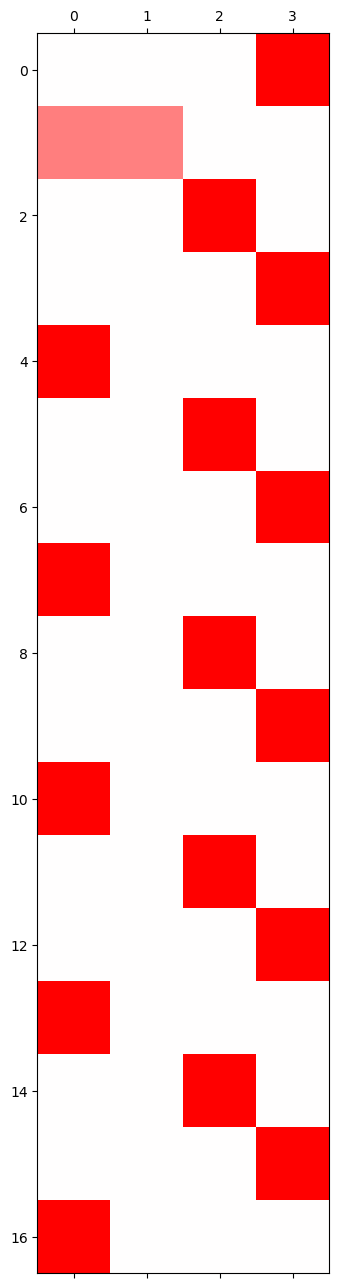

In [42]:
hidden,_ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap="bwr",vmin=-1,vmax=1)

hi?와 hi!인 경우를 분리하여 각각 네트워크를 학습시킬 경우, 분리된 데이터에 대해 잘 예측함<br>

그런데 hi!와 hi?가 분리되어 있지 않은 전체데이터를 입력으로 줬을때는 전혀 예측을 하지 못하는 모습... 이는 hi!와 hi?를 따로따로 분리하여 학습해서 !가 나오면 hi!만 반복되고 ?가 나오면 hi?만 반복되는 것으로 학습했기 때문이다. 이렇게 학습을 시키면 hi!가 3번나온 뒤 hi?가 3번나오는 데이터를 모델링하지 못한다.연결,흐름,경향은 학습하지 못했기 때문이다.

In [43]:
yy.shape,y.shape,xx.shape,x.shape

(torch.Size([8, 2, 4]),
 torch.Size([17, 4]),
 torch.Size([8, 2, 4]),
 torch.Size([17, 4]))

## 재미있는 실험
`-` x1만 배운네트워크에 x2를 넣는다면?<br>
`-` 즉, hi!만 배운 네트워크에 hi?데이터에 대해서 예측하라 하면?

준비단계

In [44]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(4,10).to("cuda")
linr = torch.nn.Linear(10,4).to("cuda")

loss_fn = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [45]:
for epoch in range(100):
    ##1 output
    hidden,(h_T,c_T) = lstm(x1)
    output = linr(hidden)
    ##2 loss
    loss = loss_fn(output,y1)
    ##3 derivative
    loss.backward()
    ##4 update & clean
    optimizer.step()
    optimizer.zero_grad()

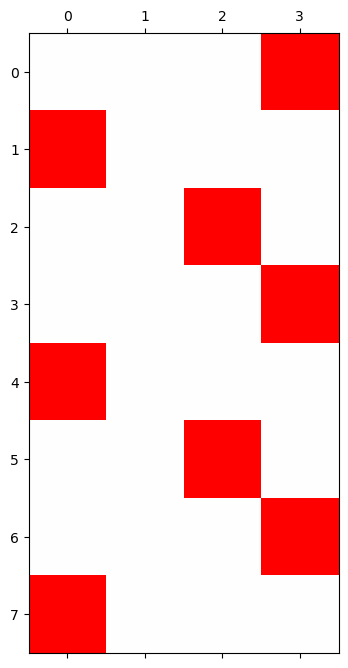

In [46]:
hidden,(h_T,c_T) = lstm(x2)
plt.matshow(soft(linr(hidden)).data.to("cpu"),cmap="bwr",vmin=-1,vmax=1)

hi?를 넣어도 hi!로 예측함!<br>
만약 x2만 넣은 경우도 마찬가지 결과가 나온다(생략)

정리 : 하나의 긴 시계열 데이터를 n개의 배치들로 나누어서 학습할 수 있다. 다만 이러한 경우에 전체시계열데이터의를 네트워크에 학습시키는 것이 아니기 때문에 전체적인 패턴,흐름,연결은 학습하지 못한다.

## 왜 배치로 나눠서 시계열 데이터를 학습해야 하는가?
1. 속도가 빠르다.
2. 연결,흐름을 파악하지 않아도 되는 독립적인 시계열 데이터셋이 있는 경우도 있다.(예를들어,독립적인 여러개의 댓글이 있는 시계열 데이터셋의 경우)
3. 이해하지 못했다 ... ㅜㅜ

참고<br>
배치사이즈는 배치가 몇개인가? or 배치안에 있는 원소가 몇개인가? 두가지 서로다른 의미가 있다. document별로 알아서 해석해야 한다.

## 똑같은 코드들 fastai,pytorch

In [47]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [48]:
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
mapping

{',': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [49]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [50]:
txt_x[0:5], txt_y[0:5]

(['one', ',', 'two', ',', 'three'], [',', 'two', ',', 'three', ','])

In [51]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda")

## fastai 사용

In [52]:
from fastai.text.all import *
#import pytorch_lightning as pl 
tr_ds = torch.utils.data.TensorDataset(x,y) 
val_ds = torch.utils.data.TensorDataset(x,y) #dummy,validation이 있다고 가정
tr_ldr = torch.utils.data.DataLoader(tr_ds,batch_size=998) #한개의 배치안에 998개의 원소가 있도록
val_ldr = torch.utils.data.DataLoader(val_ds,batch_size=998)
dls = DataLoaders(tr_ldr,val_ldr)

In [53]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(43052)
        self.lstm = torch.nn.LSTM(6,20)
        self.linr = torch.nn.Linear(20,6) 
    def forward(self,x):
        _water = torch.zeros(1,20).to("cuda:0")
        hidden, (hT,cT) =self.lstm(x,(_water,_water))
        output = self.linr(hidden)
        return output         

In [54]:
net = MyLSTM().to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
#optimizer 생략(fastai 구현시)
lrnr = Learner(dls,net,loss_fn,lr = 0.1)

In [55]:
lrnr.fit(30)

epoch,train_loss,valid_loss,time
0,1.762846,1.502211,00:00
1,1.631212,1.620583,00:00
2,1.627597,1.443686,00:00
3,1.580216,1.368762,00:00
4,1.536200,1.307310,00:00
5,1.496099,1.216339,00:00
6,1.453670,1.113821,00:00
7,1.408125,1.019931,00:00
8,1.361426,0.941434,00:00
9,1.315507,0.884033,00:00


In [56]:
soft(lrnr.model(x)).data.to("cpu").numpy().round(3)

array([[0.998, 0.   , 0.002, 0.   , 0.   , 0.   ],
       [0.   , 0.018, 0.514, 0.097, 0.096, 0.275],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       ...,
       [0.001, 0.002, 0.025, 0.001, 0.938, 0.033],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.066, 0.049, 0.005, 0.079, 0.8  ]], dtype=float32)

## torch사용

In [58]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
#동일함을 보이기 위해 fastai의 Adam사용

In [59]:
for epoc in range(10):
    ## 1 
    hidden, _ = lstm(x)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

In [60]:
hidden, _ = lstm(x)
output = linr(hidden) 
soft(output).data.to("cpu").numpy().round(3)

array([[0.935, 0.009, 0.015, 0.011, 0.016, 0.014],
       [0.133, 0.164, 0.242, 0.172, 0.141, 0.147],
       [0.982, 0.003, 0.004, 0.003, 0.004, 0.003],
       ...,
       [0.122, 0.171, 0.242, 0.174, 0.146, 0.144],
       [0.984, 0.003, 0.004, 0.002, 0.004, 0.003],
       [0.119, 0.172, 0.244, 0.175, 0.145, 0.145]], dtype=float32)

## human numbers 100

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-human_numbers_100.csv')
df

,text
0,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
2,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
3,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
4,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
...,...
1995,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1996,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, 

### 생략 .. 귀찮음

In [62]:
dls = TextDataLoaders.from_df(df,is_lm=True,seq_len=5,text_col='text')
dls.show_batch()

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


,text,text_
0,"xxbos one , two ,","one , two , three"
1,"hundred xxbos one , two","xxbos one , two ,"
2,"one hundred xxbos one ,","hundred xxbos one , two"
3,", one hundred xxbos one","one hundred xxbos one ,"
4,"nine , one hundred xxbos",", one hundred xxbos one"
5,"ninety nine , one hundred","nine , one hundred xxbos"
6,", ninety nine , one","ninety nine , one hundred"
7,"eight , ninety nine ,",", ninety nine , one"
8,"ninety eight , ninety nine","eight , ninety nine ,"
